In [1]:
# Import Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# to avoid warnings        
import warnings 
warnings.filterwarnings('ignore')



/kaggle/input/social-advertisement-dataset/social_ads.csv


In [2]:
# Read the data
ads = pd.read_csv('/kaggle/input/social-advertisement-dataset/social_ads.csv')
ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# Shape of data
ads.shape

(400, 3)

In [4]:
# Information about the data
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
# Checking for null values
ads.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
# Checkimg for duplicated data
ads.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [7]:
# The Summary of Data
ads.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


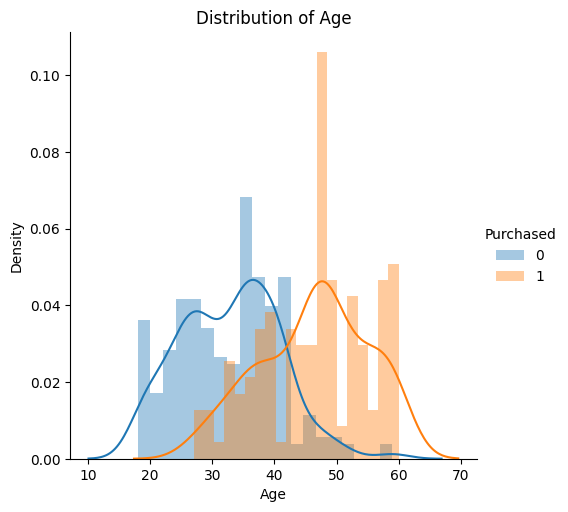

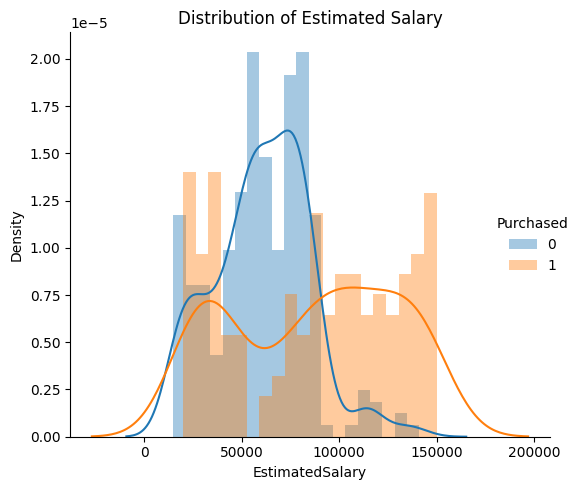

''

In [8]:
# Plotting the first subplot for 'Age'

sns.FacetGrid(ads, hue='Purchased', height=5) \
    .map(sns.distplot, 'Age', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Age")

# Plotting the second subplot for 'EstimatedSalary'

sns.FacetGrid(ads, hue='Purchased', height=5) \
    .map(sns.distplot, 'EstimatedSalary', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Estimated Salary")

# Display the entire figure with both subplots
plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()
;

**Histplot : Age & EstimatedSalary**
--
----------

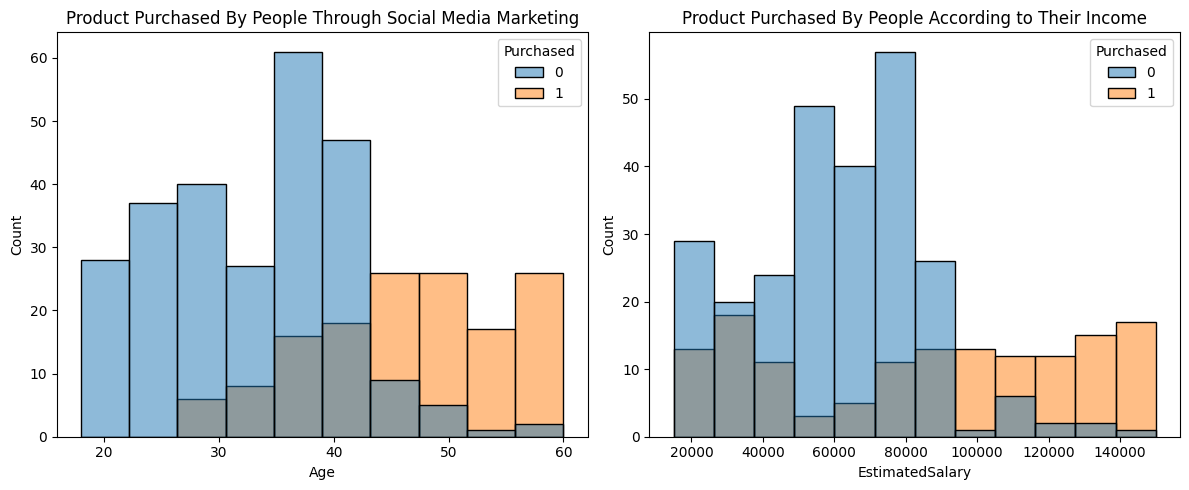

In [9]:
# Set the default figure size
plt.rcParams['figure.figsize'] = (12, 5)  # Adjust figure size as needed

plt.subplot(1,2,1)
sns.histplot(x="Age", hue="Purchased", data=ads)
plt.title("Product Purchased By People Through Social Media Marketing")

plt.subplot(1,2,2)
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=ads)
plt.tight_layout()
plt.show();

**Barplot : Purchased(Yes/No)**
--
-----------

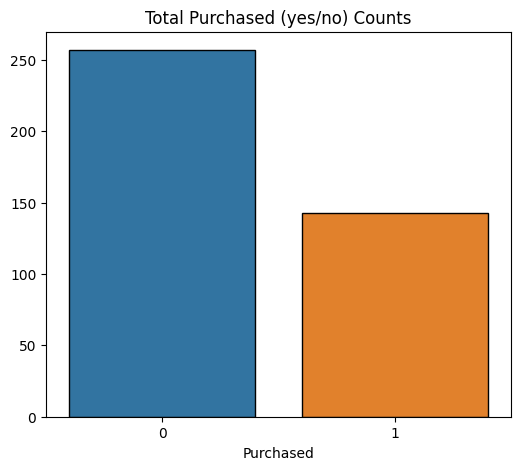

In [10]:
plt.figure(figsize=(6,5))
purchase_count=ads['Purchased'].value_counts().sort_index()
sns.barplot(x=purchase_count.index,y=purchase_count.values,edgecolor='black')
plt.title("Total Purchased (yes/no) Counts");

**Barplot : Purchased(Yes/No) Counts**
--
----------

<Figure size 800x600 with 0 Axes>

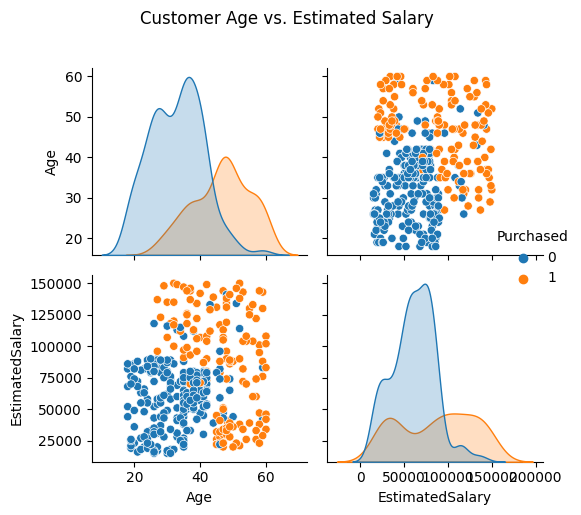

In [11]:
plt.figure(figsize=(8,6))
pairplot = sns.pairplot(ads, hue='Purchased')

# Get the figure and the axes of the pair plot
fig = pairplot.fig
fig.suptitle("Customer Age vs. Estimated Salary", y=1.02, ha='center')
plt.tight_layout()  # Adjust the bottom parameter if needed
# Show the plot
plt.show();

**Correlation between Numerical Features**
---
--------

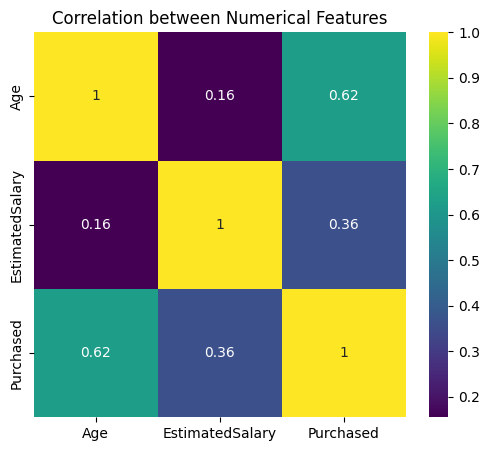

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(ads.corr(),annot=True,cmap='viridis')
plt.title("Correlation between Numerical Features");

In [13]:
# Split the data
X = ads.drop(columns=['Purchased'])
y = ads['Purchased']

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.1,random_state=2)

In [15]:
#shape of spiltted data
print("The shape of X_train :",X_train.shape)
print("The shape of X_test :",X_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (360, 2)
The shape of X_test : (40, 2)
The shape of y_train : (360,)
The shape of y_test : (40,)


In [16]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=500)

In [17]:
logit.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [18]:
y_pred_logit = logit.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_pred_logit,y_test)
cm

array([[26, 14],
       [ 0,  0]])

In [21]:
# Classification Matrix
cr = classification_report(y_pred_logit,y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        40
           1       0.00      0.00      0.00         0

    accuracy                           0.65        40
   macro avg       0.50      0.33      0.39        40
weighted avg       1.00      0.65      0.79        40



In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)

In [23]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [24]:
y_pred_dtc = dtc.predict(X_test)

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_pred_dtc,y_test)
cm

array([[24,  1],
       [ 2, 13]])

In [26]:
# Classification Matrix
cr = classification_report(y_pred_dtc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.93      0.87      0.90        15

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40

